In [2]:
#import all the necessary packages
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

from warnings import filterwarnings
filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.feature as cfeature 


In [3]:
ds = xr.open_mfdataset('C:/Users/HP/Desktop/MOZAMBIQUE/*.nc')

In [4]:
import netCDF4 as nc
from netCDF4 import Dataset

In [5]:
ds.to_netcdf('MOZAMBIQUE.nc')

In [9]:
# Load the daily rainfall data for Mozambique
ds=xr.open_dataset('MOZAMBIQUE.nc')
ds=ds.precip
ds=ds.where(ds !=-99.0)
ds

<xarray.DataArray 'precip' (datetime: 3652, lat: 68, lon: 45)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon       (lon) float32 30.0 30.25 30.5 30.75 31.0 ... 40.25 40.5 40.75 41.0
  * lat       (lat) float32 -10.0 -10.25 -10.5 -10.75 ... -26.25 -26.5 -26.75
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
Attributes:
    grid_mapping:  crs

In [10]:
# Compute the monthly rainfall totals and climatologies
monthly_totals = ds.groupby('datetime.month').sum('datetime')
monthly_climatologies = monthly_totals.mean('month')

In [11]:
# Compute the annual totals and averages across the country
annual_totals = ds.groupby('datetime.year').sum('datetime')
annual_averages = annual_totals.mean('year')

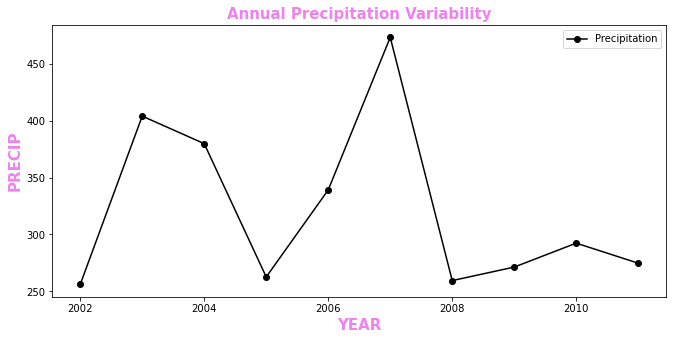

In [66]:
#plotting time series
fig,ax = plt.subplots(figsize = (11,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,annual_totals.mean(['lon','lat']),color = 'Black', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('Annual Precipitation Variability', fontweight = 'bold', fontsize=15 ,color = 'Violet')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'Violet')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15, color= 'Violet')
plt.legend()
#plt.savefig('Done1.jpeg');

In [16]:
#Computing the dry and wet days per month and per year
drydays_peryear = ds.where(ds < 1).groupby('datetime.year').count('datetime')
wetdays_peryear = ds.where(ds >= 1).groupby('datetime.year').count('datetime')
drydays_permonth = ds.where(ds < 1).groupby('datetime.month').count('datetime')
wetdays_permonth = ds.where(ds >= 1).groupby('datetime.month').count('datetime')

# Computing the extreme rainfall days (RR > 10mm and RR > 20mm)
extreme_days_10mm = ds.where(ds > 10).groupby('datetime.year').count('datetime')
extreme_days_20mm = ds.where(ds > 20).groupby('datetime.year').count('datetime')

# Extreme Rainfall >10mm per month
extreme_rr10mm_days = ds.where(ds > 10).groupby('datetime.month').count('datetime')
# Extreme Rainfall >20mm per month
extreme_rr20mm_days = ds.where(ds > 20).groupby('datetime.month').count('datetime')






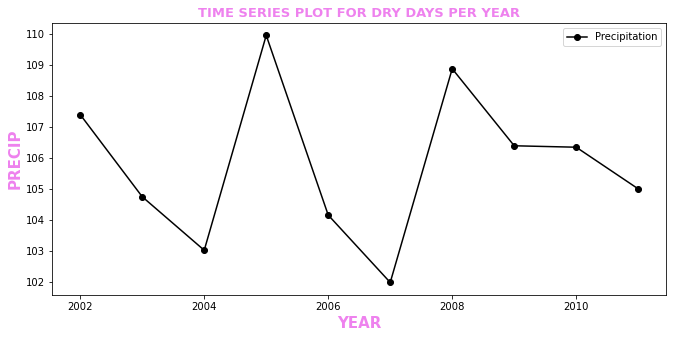

In [63]:
#plot the time series for dry Days per year
fig,ax = plt.subplots(figsize = (11,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,drydays_peryear.mean(['lon','lat']),color = 'black', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('TIME SERIES PLOT FOR DRY DAYS PER YEAR', fontweight = 'bold', fontsize=13 ,color = 'violet')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'violet')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15, color= 'violet')
plt.legend()
#plt.savefig('Done2.jpeg');

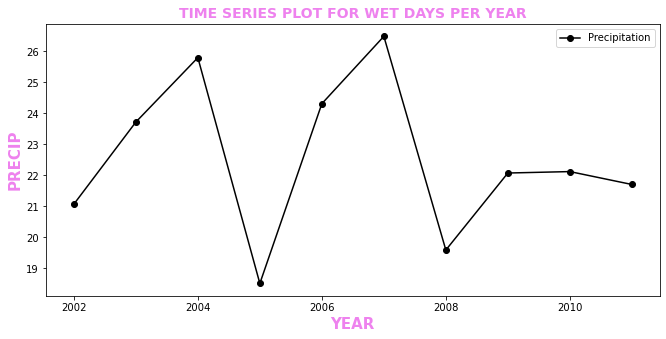

In [61]:
#plot the time series for wet days per year
fig,ax = plt.subplots(figsize = (11,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,wetdays_peryear.mean(['lon','lat']),color = 'black', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('TIME SERIES PLOT FOR WET DAYS PER YEAR', fontweight = 'bold', fontsize=14 ,color = 'violet')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'violet')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15, color= 'violet')
plt.legend()
#plt.savefig('Done3.jpeg');

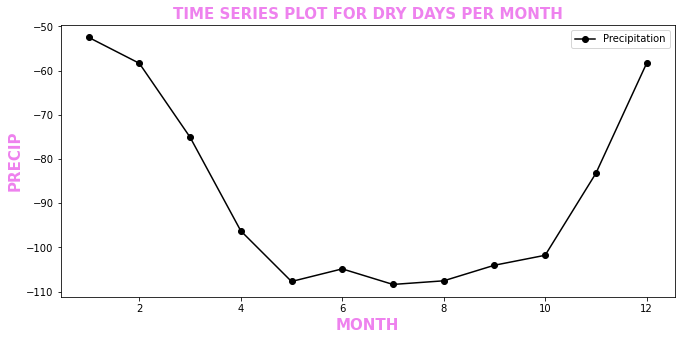

In [59]:
#plot the time series for dry days per month
fig,ax = plt.subplots(figsize = (11,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(monthly_totals.month,drydays_permonth.mean(['lon','lat'])*-1,color = 'black', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('TIME SERIES PLOT FOR DRY DAYS PER MONTH', fontweight = 'bold', fontsize=15 ,color = 'violet')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 15, color= 'violet')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15, color= 'violet')
plt.legend()
#plt.savefig('Done4.jpeg');

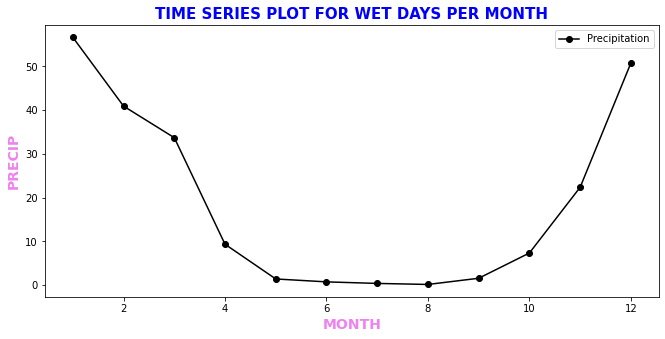

In [57]:
#plot the time series for wet days per month
fig,ax = plt.subplots(figsize = (11,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(monthly_totals.month,wetdays_permonth.mean(['lon','lat']),color = 'black', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('TIME SERIES PLOT FOR WET DAYS PER MONTH', fontweight = 'bold', fontsize=15 ,color = 'Blue')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 14, color= 'violet')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 14, color= 'violet')
plt.legend()
#plt.savefig('Done5.jpeg');

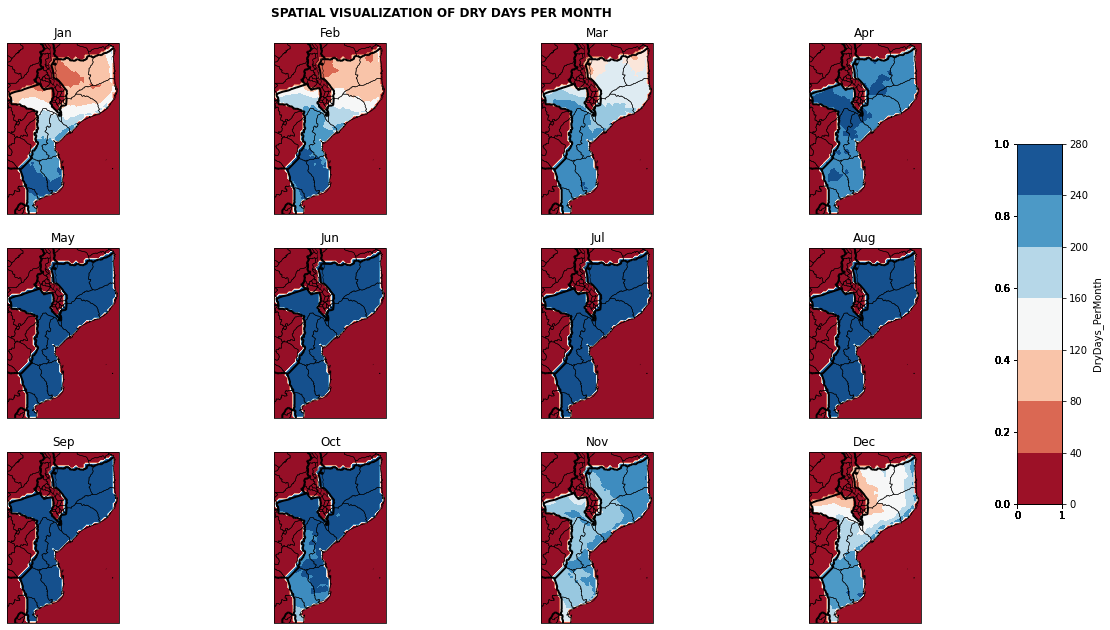

In [55]:
# spatial visualization of dry days per month
fig,ax=plt.subplots(3,4,figsize=(25,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([30.0,41.0,-10.0,-26.75])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(drydays_permonth.lon, drydays_permonth.lat, drydays_permonth[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='DryDays_PerMonth')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL VISUALIZATION OF DRY DAYS PER MONTH', fontweight='bold');
#plt.savefig('Done6.jpeg');

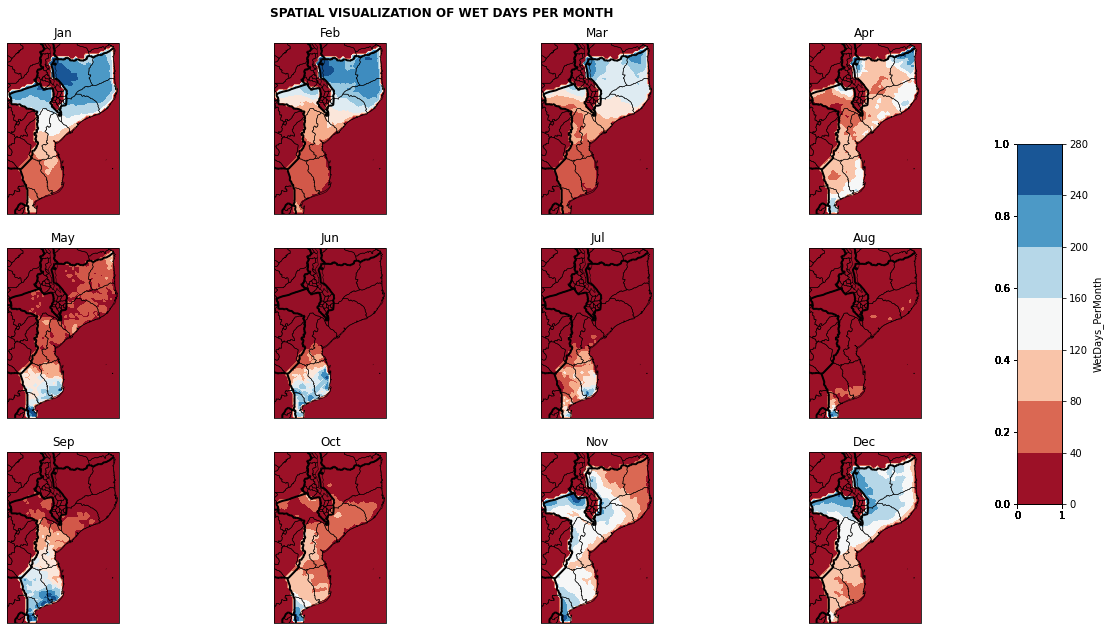

In [54]:
# spatial visualization of wet days per month
fig,ax=plt.subplots(3,4,figsize=(25,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)

    ax[i].set_extent([30.0,41.0,-10.0,-26.75])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wetdays_permonth.lon, wetdays_permonth.lat, wetdays_permonth[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='WetDays_PerMonth')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL VISUALIZATION OF WET DAYS PER MONTH', fontweight='bold');
#plt.savefig('don7.png');

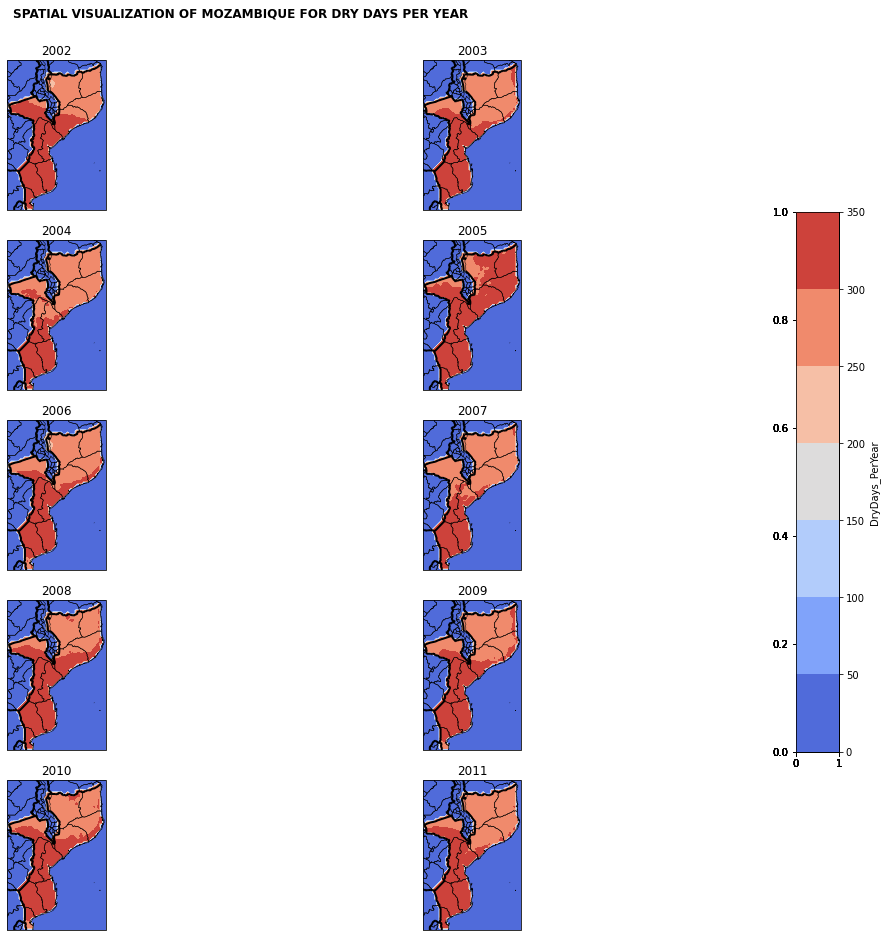

In [51]:
# spatial visualization of dry days per year
fig,ax=plt.subplots(5,2,figsize=(24,15), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)

    ax[i].set_extent([30.0,41.0,-10.0,-26.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(drydays_peryear.lon, drydays_peryear.lat, drydays_peryear[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='DryDays_PerYear')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL VISUALIZATION OF MOZAMBIQUE FOR DRY DAYS PER YEAR ', fontweight='bold');
#plt.savefig('done8.png');

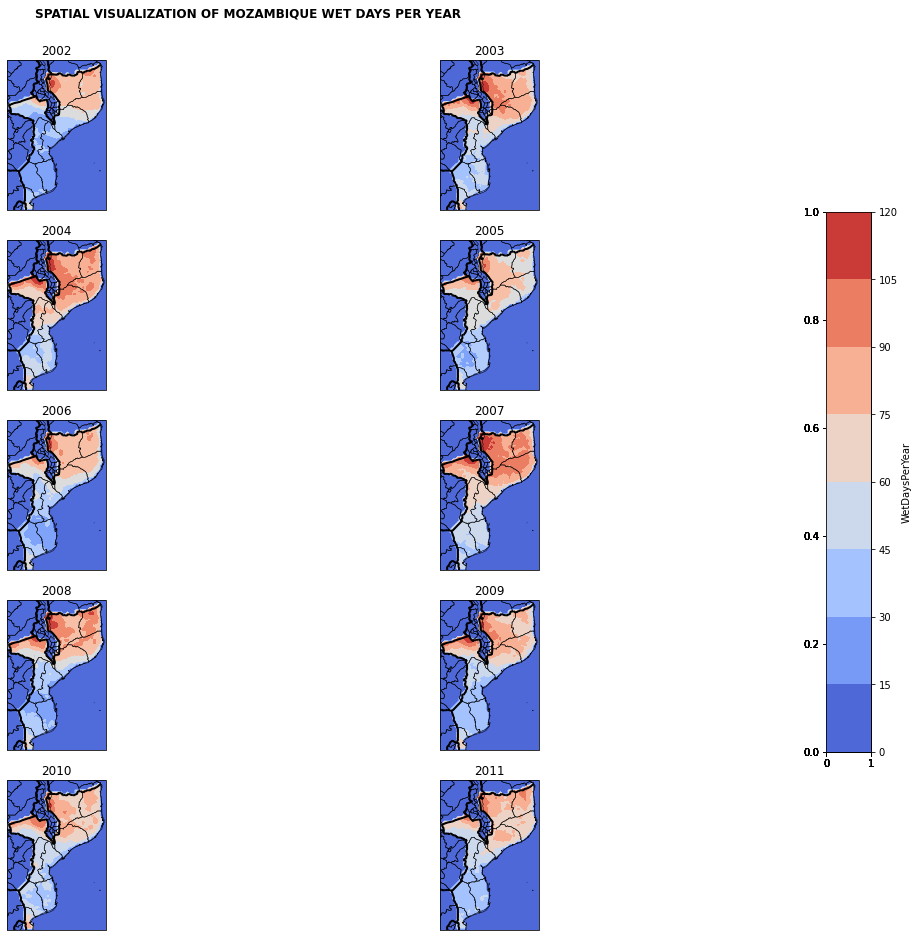

In [49]:
# spatial visualization OF wet days per year
fig,ax=plt.subplots(5,2,figsize=(25,15), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)

    ax[i].set_extent([30.0,41.0,-10.0,-26.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(wetdays_peryear.lon, wetdays_peryear.lat, wetdays_peryear[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='WetDaysPerYear')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL VISUALIZATION OF MOZAMBIQUE WET DAYS PER YEAR ', fontweight='bold');
#plt.savefig('done9.png');

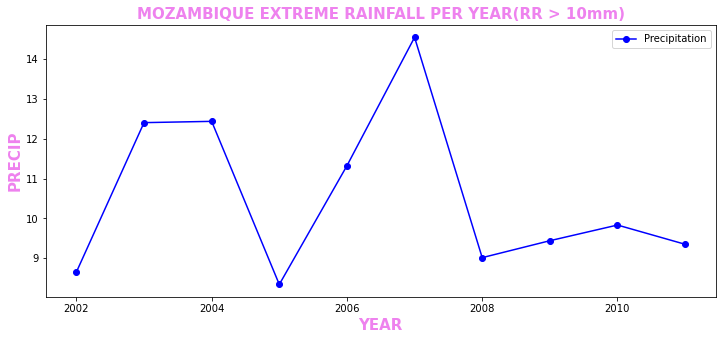

In [48]:
#plot the time series for extreme dry days per year(RR > 10mm)
fig,ax = plt.subplots(figsize = (12,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(extreme_days_10mm.year,extreme_days_10mm.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('MOZAMBIQUE EXTREME RAINFALL PER YEAR(RR > 10mm)', fontweight = 'bold', fontsize=15 ,color = 'violet')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'violet')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15, color= 'violet')
plt.legend()
#plt.savefig('Done10.jpeg');

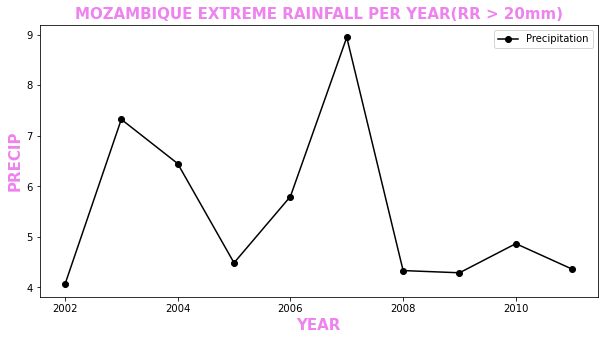

In [47]:
#plot the time series for extreme dry days per year(RR > 20mm)
fig,ax = plt.subplots(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(extreme_days_20mm .year,extreme_days_20mm.mean(['lon','lat']),color = 'black', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('MOZAMBIQUE EXTREME RAINFALL PER YEAR(RR > 20mm)', fontweight = 'bold', fontsize=15 ,color = 'violet')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'violet')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15, color= 'violet')
plt.legend()
#plt.savefig('Done11.jpeg');


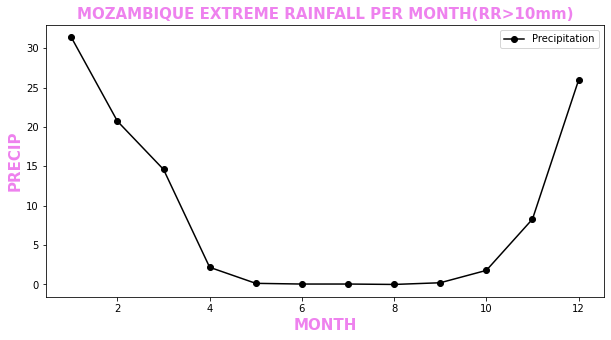

In [46]:
#plot the extreme dry days per month(RR > 10mm)
fig,ax = plt.subplots(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(extreme_rr10mm_days.month,extreme_rr10mm_days.mean(['lon','lat']),color = 'black', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('MOZAMBIQUE EXTREME RAINFALL PER MONTH(RR>10mm)', fontweight = 'bold', fontsize=15 ,color = 'Violet')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 15, color= 'Violet')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15, color= 'Violet')
plt.legend()

#plt.savefig('Done12.jpeg');

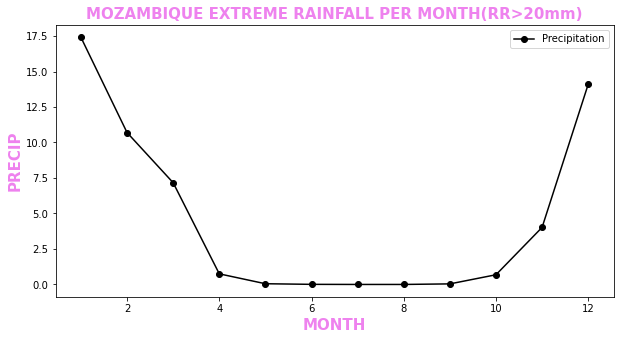

In [45]:
#plot the extreme dry days per month(RR > 20mm)
fig,ax = plt.subplots(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(extreme_rr20mm_days.month,extreme_rr20mm_days.mean(['lon','lat']),color = 'black', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('MOZAMBIQUE EXTREME RAINFALL PER MONTH(RR>20mm)', fontweight = 'bold', fontsize=15 ,color = 'Violet')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 15, color= 'Violet')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15, color= 'Violet')
plt.legend()


#plt.savefig('Done13.jpeg');

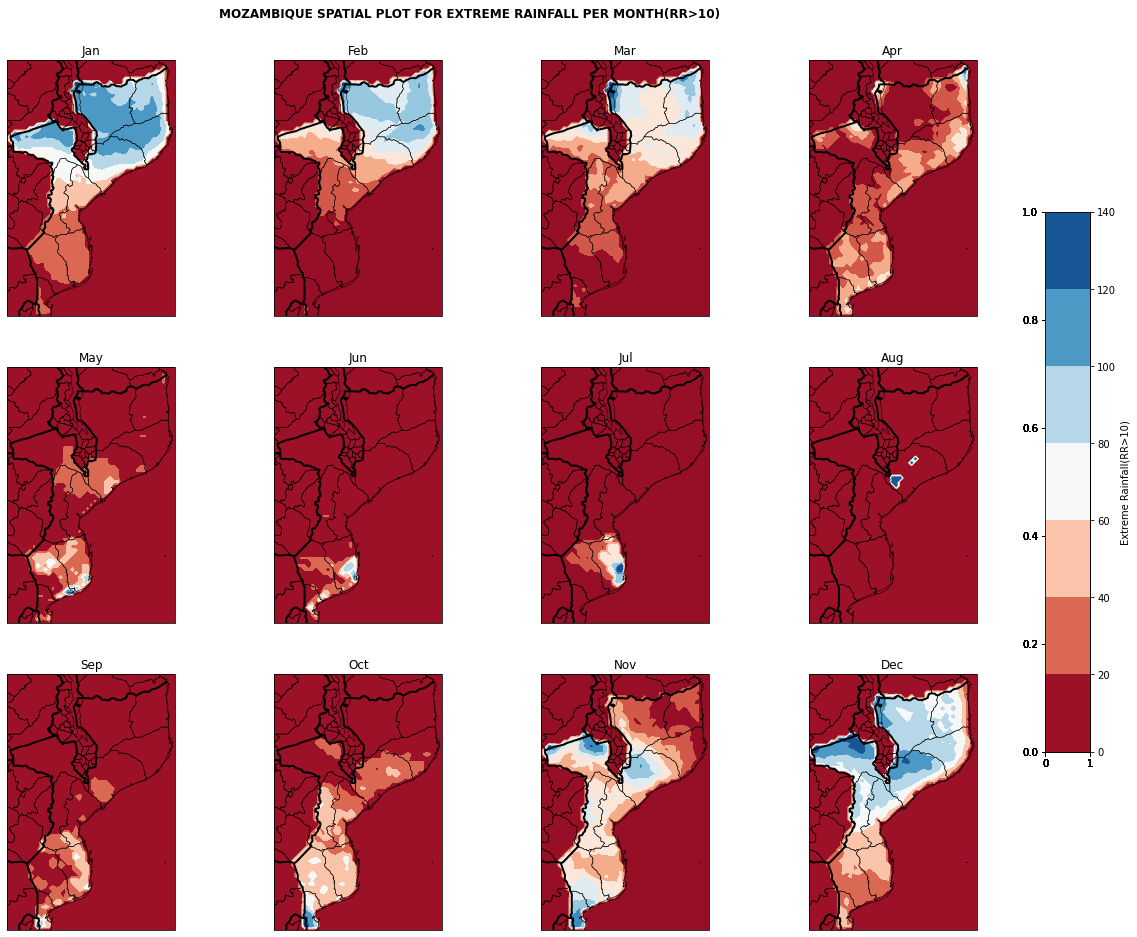

In [44]:
# spatial plots for EXTREME RAINFALL PER MONTH(RR>10)
fig,ax=plt.subplots(3,4,figsize=(25,15), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([30.0,41.0,-10.0,-26.75])

    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(extreme_rr10mm_days.lon, extreme_rr10mm_days.lat, extreme_rr10mm_days[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Extreme Rainfall(RR>10)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MOZAMBIQUE SPATIAL PLOT FOR EXTREME RAINFALL PER MONTH(RR>10)', fontweight='bold');
#plt.savefig('done14.jpeg');



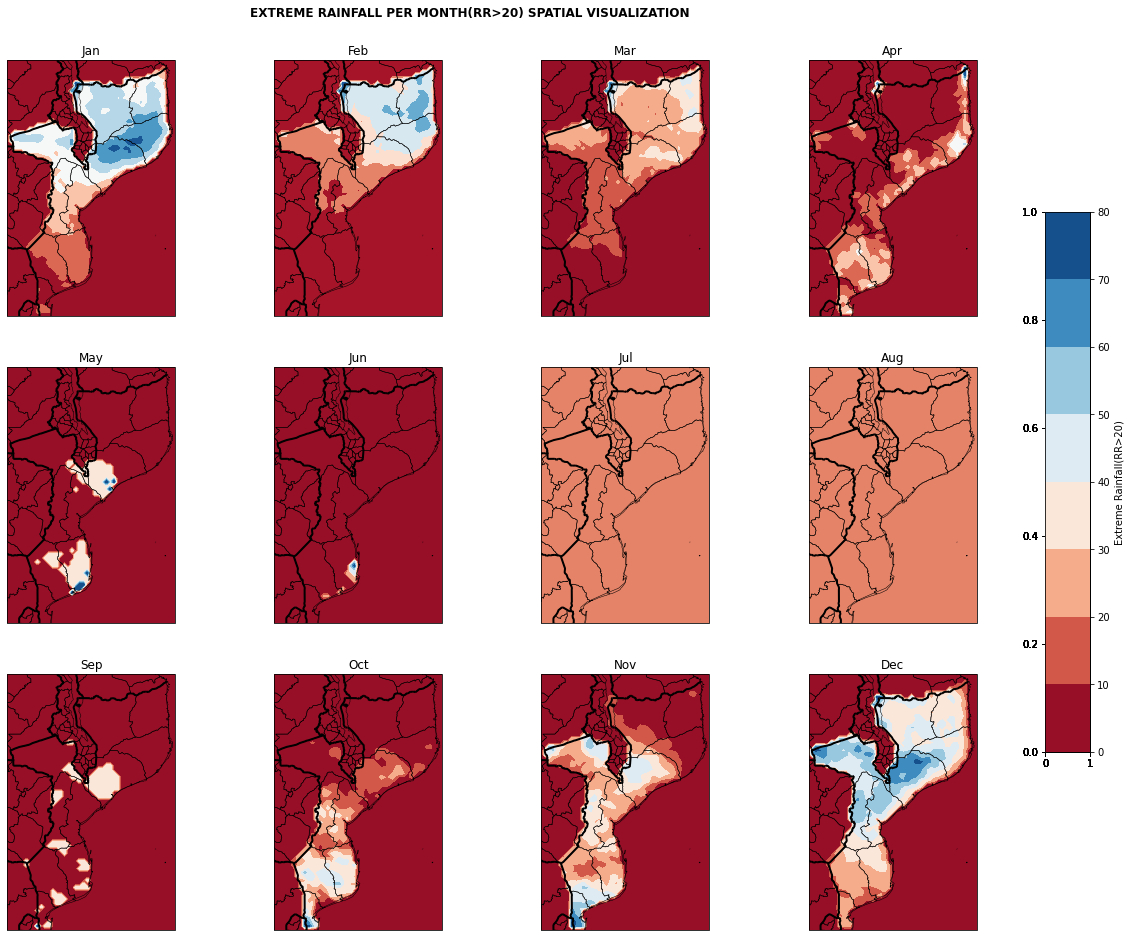

In [42]:
# spatial plots for EXTREME RAINFALL PER MONTH(RR>20)
fig,ax=plt.subplots(3,4,figsize=(25,15), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([30.0,41.0,-10.0,-26.75])

    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(extreme_rr20mm_days.lon, extreme_rr20mm_days.lat, extreme_rr20mm_days[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Extreme Rainfall(RR>20)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('EXTREME RAINFALL PER MONTH(RR>20) SPATIAL VISUALIZATION', fontweight='bold');
#plt.savefig('done15.jpeg');



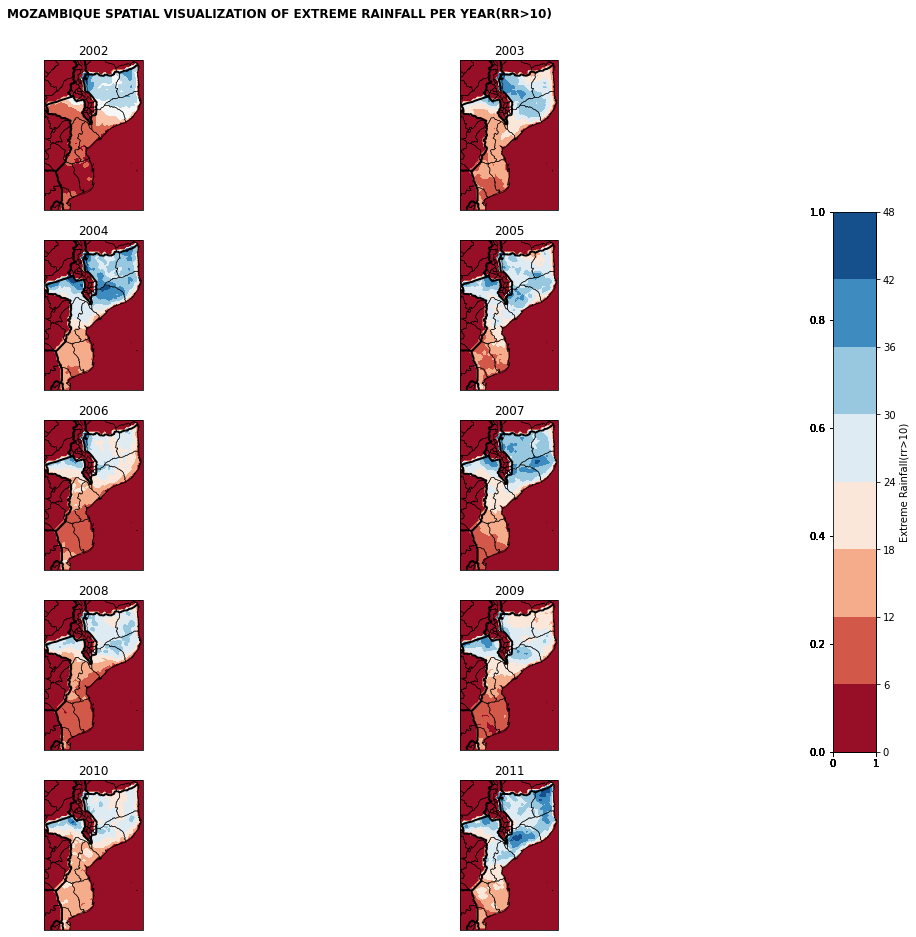

In [41]:
# spatial plots for Extreme days per year(rr>10)
fig,ax=plt.subplots(5,2,figsize=(24,15), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)

    ax[i].set_extent([30.0,41.0,-10.0,-26.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(extreme_days_10mm.lon, extreme_days_10mm.lat, extreme_days_10mm[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Extreme Rainfall(rr>10)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MOZAMBIQUE SPATIAL VISUALIZATION OF EXTREME RAINFALL PER YEAR(RR>10)', fontweight='bold');
plt.savefig('done16.JPEG');

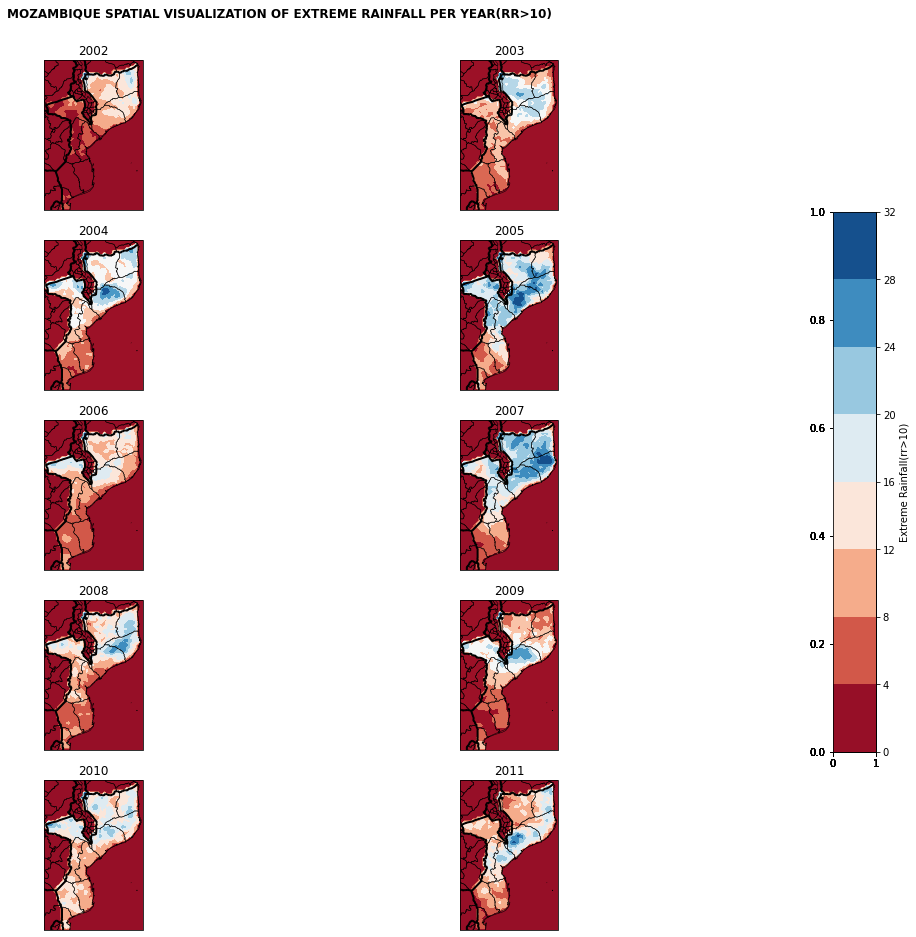

In [40]:
# spatial plots for Extreme days per year(rr>20)
fig,ax=plt.subplots(5,2,figsize=(24,15), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)

    ax[i].set_extent([30.0,41.0,-10.0,-26.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(extreme_days_20mm.lon, extreme_days_20mm.lat, extreme_days_20mm[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Extreme Rainfall(rr>10)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MOZAMBIQUE SPATIAL VISUALIZATION OF EXTREME RAINFALL PER YEAR(RR>10)', fontweight='bold');
plt.savefig('done17.JPEG');